<a href="https://colab.research.google.com/github/SamanvithaBolem/SamanvithaBolem/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [121]:
file = pd.read_csv('/content/Property_Price_Train.csv')

In [122]:
file.shape

(1459, 81)

In [123]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

Build a Base Model

In [124]:
category_columns = file.columns[file.dtypes=='object']

numeric_columns = file.columns[file.dtypes!='object']

In [125]:
category_data = file[category_columns] #build data

In [126]:
category_data.head()

,Zoning_Class,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinType2,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,Kitchen_Quality,Functional_Rate,Fireplace_Quality,Garage,Garage_Finish_Year,Garage_Quality,Garage_Condition,Pavedd_Drive,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Sale_Type,Sale_Condition
0,RLD,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RLD,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,Gable,SS,MetalSd,MetalSd,None,TA,TA,CB,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RLD,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RLD,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,Gable,SS,Wd Sdng,Wd Shng,None,TA,TA,BT,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,TF,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RLD,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,Gable,SS,VinylSd,VinylSd,BrkFace,Gd,TA,PC,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TF,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [127]:
numeric_data = file[numeric_columns]

In [128]:
numeric_data.head()

,Id,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [129]:
data = numeric_data

In [130]:
data.shape

(1459, 38)

In [131]:
data=data.drop("Id",axis=1)

In [132]:
data.shape

(1459, 37)

In [133]:
data.isna().sum().sort_values(ascending=False)

Lot_Extent                   259
Garage_Built_Year             81
Brick_Veneer_Area              8
Sale_Price                     0
BsmtUnfSF                      0
Grade_Living_Area              0
LowQualFinSF                   0
Second_Floor_Area              0
First_Floor_Area               0
Total_Basement_Area            0
BsmtFinSF1                     0
BsmtFinSF2                     0
Underground_Half_Bathroom      0
Remodel_Year                   0
Construction_Year              0
House_Condition                0
Overall_Material               0
Lot_Size                       0
Underground_Full_Bathroom      0
Full_Bathroom_Above_Grade      0
Year_Sold                      0
Open_Lobby_Area                0
Month_Sold                     0
Miscellaneous_Value            0
Pool_Area                      0
Screen_Lobby_Area              0
Three_Season_Lobby_Area        0
Enclosed_Lobby_Area            0
W_Deck_Area                    0
Half_Bathroom_Above_Grade      0
Garage_Are

In [134]:
data['Lot_Extent'].fillna(data['Lot_Extent'].median(),inplace=True)

data['Garage_Built_Year'].fillna(data['Garage_Built_Year'].median(),inplace=True)

data['Brick_Veneer_Area'].fillna(data['Brick_Veneer_Area'].median(),inplace=True)

In [135]:
data.isna().sum().sort_values(ascending=False)

Sale_Price                   0
Underground_Half_Bathroom    0
Grade_Living_Area            0
LowQualFinSF                 0
Second_Floor_Area            0
First_Floor_Area             0
Total_Basement_Area          0
BsmtUnfSF                    0
BsmtFinSF2                   0
BsmtFinSF1                   0
Brick_Veneer_Area            0
Remodel_Year                 0
Construction_Year            0
House_Condition              0
Overall_Material             0
Lot_Size                     0
Lot_Extent                   0
Underground_Full_Bathroom    0
Full_Bathroom_Above_Grade    0
Year_Sold                    0
Half_Bathroom_Above_Grade    0
Month_Sold                   0
Miscellaneous_Value          0
Pool_Area                    0
Screen_Lobby_Area            0
Three_Season_Lobby_Area      0
Enclosed_Lobby_Area          0
Open_Lobby_Area              0
W_Deck_Area                  0
Garage_Area                  0
Garage_Size                  0
Garage_Built_Year            0
Fireplac

In [136]:
data.head()

,Building_Class,Lot_Extent,Lot_Size,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Rooms_Above_Grade,Fireplaces,Garage_Built_Year,Garage_Size,Garage_Area,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Price
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,1085.793744,163.788080,69.596115,20.337934,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,196.316304,198.900074,74.716033,15.039392,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,218.068403,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,696.996439,46.948018,40.181415,60.921821,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,568.859882,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,250000


In [137]:
X = data.iloc[:,:-1]

y= data.iloc[:,-1]

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75,test_size=0.25)

In [140]:
print('Xtrain size is=',Xtrain.shape)
print('Xtest size is=',Xtest.shape)
print('ytrain size is=',ytrain.shape)
print('ytest size is=',ytest.shape)

Xtrain size is= (1094, 36)
Xtest size is= (365, 36)
ytrain size is= (1094,)
ytest size is= (365,)


In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
model = LinearRegression().fit(X,y)

In [143]:
model.intercept_

304951.2178206349

In [144]:
model.coef_

array([-1.82248468e+02, -6.72437428e+01,  4.51626447e-01,  1.72788661e+04,
        4.80460692e+03,  2.67643102e+02,  1.38726791e+02,  3.14903399e+01,
        9.68014852e+00,  6.23378694e-04, -1.80480115e-01,  9.50029179e+00,
        1.85993478e+01,  1.85972174e+01, -5.85997718e+00,  3.13365880e+01,
        9.93006387e+03,  2.73253440e+03,  3.49963477e+03, -1.89996143e+03,
       -1.01197470e+04, -1.31599364e+04,  5.07889019e+03,  4.28917047e+03,
        1.33974747e+02,  1.04538287e+04,  1.07633061e+00,  2.29098677e+00,
        7.25138984e+00,  1.04083159e+01,  1.42533848e+01,  4.69074629e+01,
       -2.60648877e+01, -6.63877362e-01, -2.62815364e+01, -7.11872473e+02])

In [145]:
data.columns


Index(['Building_Class', 'Lot_Extent', 'Lot_Size', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'First_Floor_Area', 'Second_Floor_Area',
       'LowQualFinSF', 'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_Above_Grade', 'Bedroom_Above_Grade',
       'Kitchen_Above_Grade', 'Rooms_Above_Grade', 'Fireplaces',
       'Garage_Built_Year', 'Garage_Size', 'Garage_Area', 'W_Deck_Area',
       'Open_Lobby_Area', 'Enclosed_Lobby_Area', 'Three_Season_Lobby_Area',
       'Screen_Lobby_Area', 'Pool_Area', 'Miscellaneous_Value', 'Month_Sold',
       'Year_Sold', 'Sale_Price'],
      dtype='object')

In [146]:
ypred = model.predict(Xtest)

In [147]:
ypred

array([319300.5595196 , 208469.2956393 , 236093.85761077, 323775.37442777,
        81194.07621072, 180827.1178562 , 106740.1950356 , 235562.16872428,
       199943.87044552, 133603.45390186, 133428.77193156, 126765.87441315,
       190752.58803817, 176728.87730716, 139445.93777922, 139582.2157313 ,
       137309.14880685, 110116.52535598, 196090.7690615 , 234630.0175399 ,
       110882.58757847, 214858.94788316, 111179.99513197, 226069.58554692,
       153439.74008402, 234139.19927486, 130287.11626668, 109389.13249556,
       219983.84241883, 139881.98238094, 130417.03100442, 122468.98035349,
       137237.71789197, 131674.14462988, 228685.19739694, 230676.37749066,
       203898.49391384, 122264.67813331, 231810.18405985, 145804.49770495,
       109816.00890141, 194787.14965501, 119743.07121904, 205980.5851295 ,
       174060.73101776, 104462.73845092,  93321.40551865,  92801.94061969,
        98221.48127511,  98253.3003875 , 275371.59030844, 280359.76332424,
       283908.3632452 , 3

In [148]:
ytest

994     337500
1174    239000
280     228500
981     336000
427     109008
         ...  
1450    136000
1400    120000
1077    138800
786     139000
792     269790
Name: Sale_Price, Length: 365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


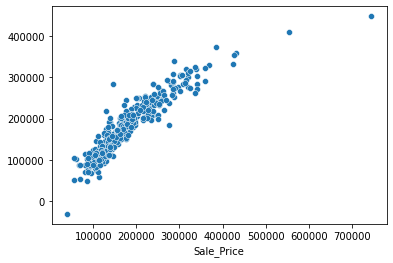

In [149]:
sns.scatterplot(ytest,ypred)

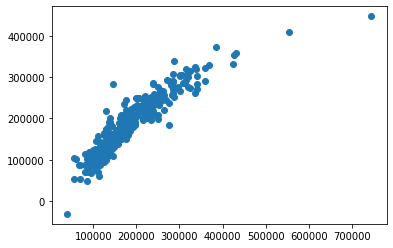

In [150]:
import matplotlib.pyplot as plt
plt.scatter(ytest,ypred)

In [151]:
Accuracy = sklearn.metrics.r2_score(ytest,ypred)
print(Accuracy)

0.8425715569250666


In [152]:
RMSE = sklearn.metrics.mean_squared_error(ytest,ypred)
print(RMSE)

951485076.873502


1st case 80/20 0.7961 and 1407546236.602066
 
2nd case 85/15 0.6041 and 3074413715.1899123

3rd case 75/25 0.8425 and 951485076.873502
